In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('./datasett_oppgave2.csv')

label_encoder = LabelEncoder()

# test 
print(df['cp'])

# Automatically transform all categorical columns to numerical values
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])



0       typical angina
1         asymptomatic
2         asymptomatic
3          non-anginal
4      atypical angina
            ...       
915       asymptomatic
916     typical angina
917       asymptomatic
918       asymptomatic
919    atypical angina
Name: cp, Length: 920, dtype: object


In [73]:
# test code



print(df['cp']) 

0      3
1      0
2      0
3      2
4      1
      ..
915    0
916    3
917    0
918    0
919    1
Name: cp, Length: 920, dtype: int64


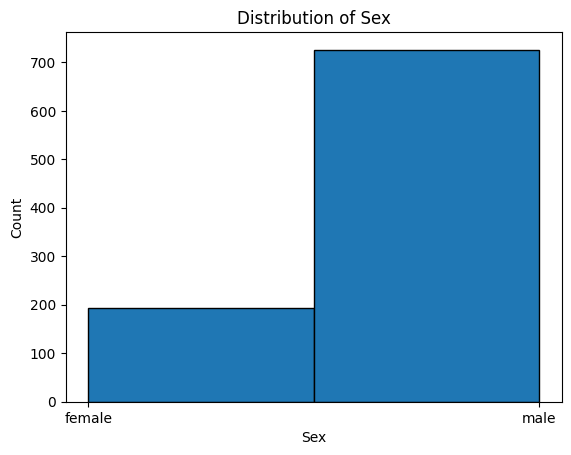

In [74]:
# Lager plot av kjønn
ax = df['sex'].plot(kind='hist',bins=2, edgecolor='black')

# Bytter ut 0 og 1 med male og female for å gjøre det mer leselig
ax.set_xticks([0, 1])
ax.set_xticklabels(['female', 'male'])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

In [75]:
import plotly.express as px
import numpy as np

#Drope id
df_no_id = df.drop('id', axis=1)

# Calculate the correlation matrix
corr_matrix = df_no_id.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)

# Create a heatmap of the correlation matrix using plotly
fig = px.imshow(corr_matrix_masked, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix Heatmap')

# Show the plot
fig.show()


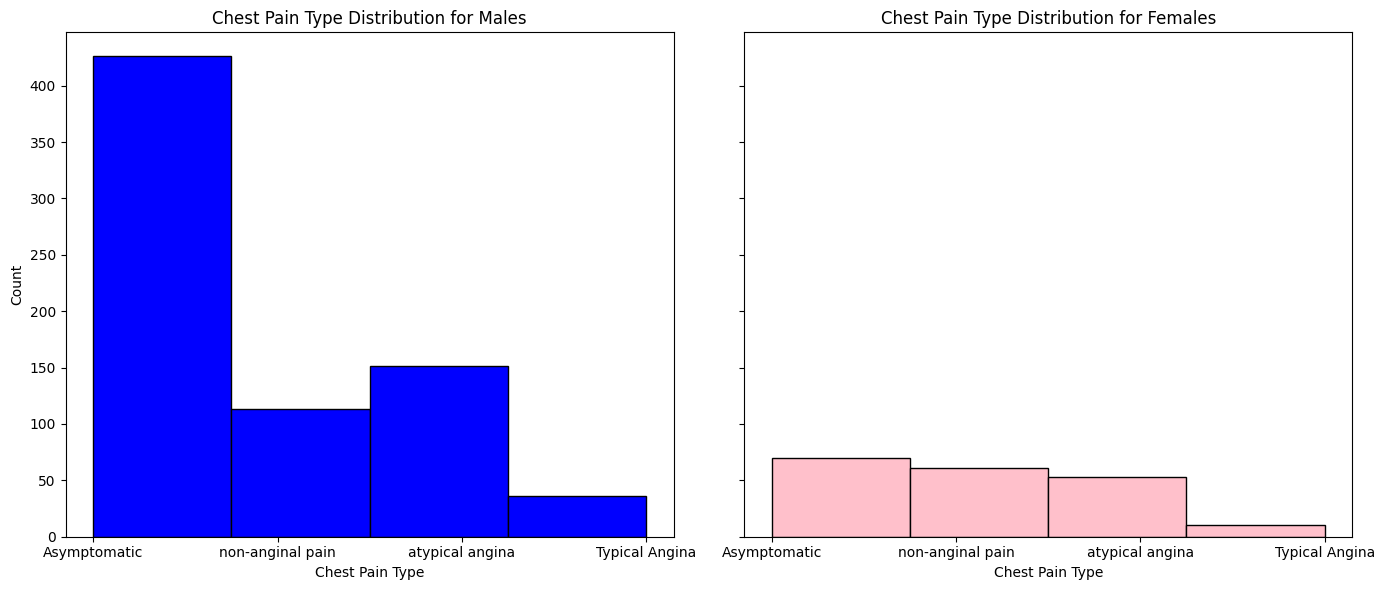

In [76]:
# Separate the data for males and females
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# 3 = typical angina
# 2 = atypical angina
# 1 = non-anginal pain
# 0 = asymptomatic 

# Plot for males
df_male['cp'].plot(kind='hist', bins=4, ax=axes[0], color='blue', edgecolor='black')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['Asymptomatic', 'non-anginal pain', 'atypical angina', 'Typical Angina'])
axes[0].set_title('Chest Pain Type Distribution for Males')
axes[0].set_xlabel('Chest Pain Type')
axes[0].set_ylabel('Count')

# Plot for females
df_female['cp'].plot(kind='hist', bins=4, ax=axes[1], color='pink', edgecolor='black')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Asymptomatic', 'non-anginal pain', 'atypical angina', 'Typical Angina'])
axes[1].set_title('Chest Pain Type Distribution for Females')
axes[1].set_xlabel('Chest Pain Type')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and standard deviation of the 'age' column
mean_age = df['age'].mean()
std_age = df['age'].std()

# Create a histogram for the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(mean_age + std_age, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_age + std_age:.2f}')
plt.axvline(mean_age - std_age, color='green', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend()

# Show the plot
plt.show()

C:\Users\Kasper Haugen Furu\AppData\Local\Temp\ipykernel_24572\1244005710.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




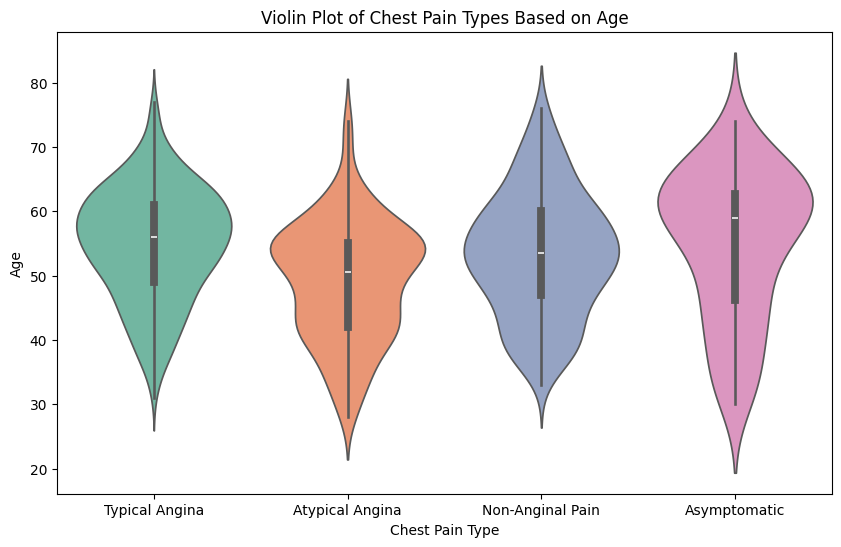

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='age', data=df, palette='Set2')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Violin Plot of Chest Pain Types Based on Age')
plt.show()

C:\Users\Kasper Haugen Furu\AppData\Local\Temp\ipykernel_24572\1177185294.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




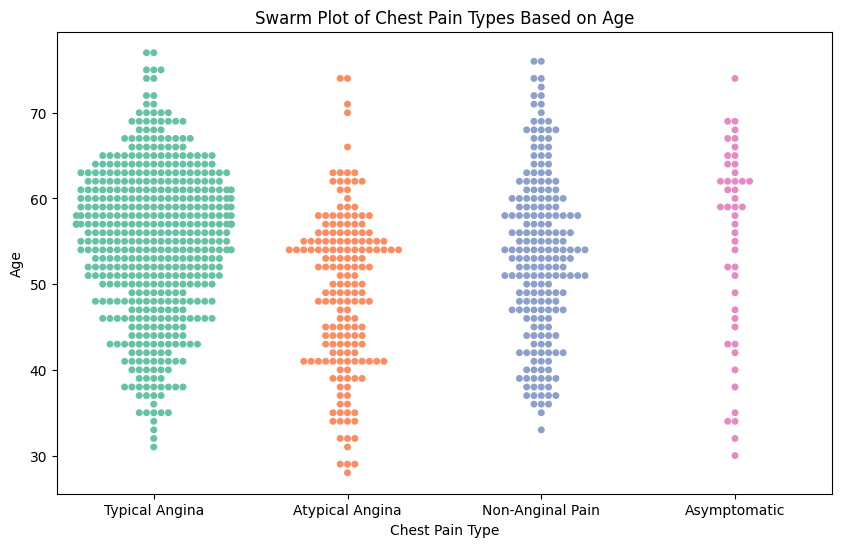

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='cp', y='age', data=df, palette='Set2')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Swarm Plot of Chest Pain Types Based on Age')
plt.show()